<a href="https://colab.research.google.com/github/aehyj92/DeepLearning_Education/blob/main/Gang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [2]:
x = np.loadtxt('x.csv', delimiter=',', dtype=np.float32)
y = np.loadtxt('y.csv', delimiter=',', dtype=np.float32)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3)

In [4]:
model = MLPRegressor(hidden_layer_sizes=[64, 256, 1024], max_iter=5000, alpha=0.005)
model.fit(x_train, y_train)

MLPRegressor(alpha=0.005, hidden_layer_sizes=[64, 256, 1024], max_iter=5000)

In [5]:
print(model.__class__)
print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_test, model.predict(x_test)))

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
0.9010356073478697
0.038399797094166375


In [6]:
from joblib import dump
dump(model, 'ctrl.joblib')

['ctrl.joblib']

In [7]:
A = np.array([[0.8189, 0.0863, 0.0900, 0.0813],
              [0.2524, 1.0033, 0.0313, 0.2004],
              [-0.0545, 0.0102, 0.7901, -0.2580],
              [-0.1918, -0.1034, 0.1602, 0.8604]])
Bu = np.array([[0.0045, 0.0044],[0.1001, 0.0100],[0.0003, -0.0136],[-0.0051, 0.0936]])

N = 100
x = np.zeros((4, N+1))
u = np.zeros((2, N+1))

lb, ub = -1, 1
x[:,0] = lb + (ub-lb)*np.random.rand(4,)
print(x[:,0])

[ 0.75600946  0.92711379  0.78537669 -0.72277964]


In [8]:
x0 = np.array(x[0:3,0])
x0 = np.append(x0, np.array([0, 0]))
p = model.predict(x0.reshape(1,5))
u[:,0] = p[:,1:3];
for k in range(0, N):
    x[:,k+1] = A @ x[:,k] + Bu @ u[:,k]
    xk = np.array(x[0:3,k+1])
    xk = np.append(xk, u[:,k])
    p = model.predict(xk.reshape(1,5))
    u[:,k+1] = p[:,1:3];

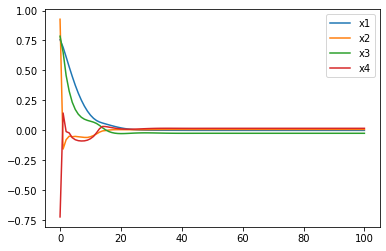

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

t = np.linspace(0, N, N + 1)
plt.plot(t, x[0,:])
plt.plot(t, x[1,:])
plt.plot(t, x[2,:])
plt.plot(t, x[3,:])
plt.legend(["x1", "x2", "x3", "x4"])

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential()
model.add(layers.Dense(64, input_dim=5))
model.add(layers.Dense(256))
model.add(layers.Dense(1024))
model.add(layers.Dense(3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 256)               16640     
                                                                 
 dense_5 (Dense)             (None, 1024)              263168    
                                                                 
 dense_6 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 283,267
Trainable params: 283,267
Non-trainable params: 0
_________________________________________________________________


In [ ]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
model.fit(x_train, y_train, epochs=5000, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................